# Titanic (Supervised Machine Learning Problem) - Predicting Gender

Table of Contents:

1.   Introduction to the Problem
2.   Dataset Description
3.   Imports
4.   Exploratory Data Analysis (EDA)
5.   Data Preprocessing
6.   Modelling
7.   Evaluation
8.   Model Comparison

## 1. Introduction to the Problem

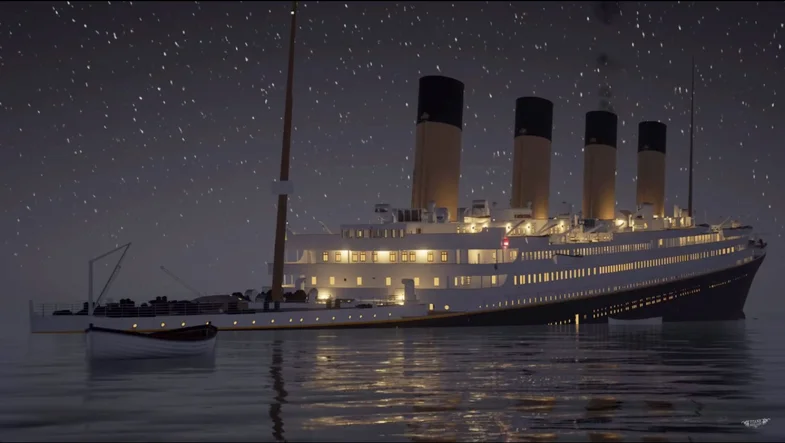

Titanic is one of the most famous datasets for machine learning.

We are given information about 891 titanic passengers and whether they survived or not.

As opposed to predicting if a passenger survived or not, this project has a task to build a ML model predicting the gender of passengers.

This project also includes EDA and data preprocessing followed by applying multiple different models including Logistic regression, Decision tree, Random forests, and Artificial neural networks.

## 2. Dataset Description

**Dataset source**: https://www.kaggle.com/c/titanic/data

**Data**: The original data has been split into two groups:

- 1) Training set (train.csv)
- 2) Test set (test.csv) - This file does not contain the "Survived" column

However, since we want to predict gender as opposed to survival, we will only use the training set as the whole dataframe, and not use the test set at all.

**Total nr. of rows**: 891

**Nr. of explanatory features**: 11

**Binary target variable**: Sex (0 will mean Female, 1 will mean Male)

**Features available**:

- 1) **PassengerId** - Unique ID given to identify a particular passenger (this variable will not be used for classification)

- 2) **Survived** - Whether the passenger survived or not (0 = Did not survive, 1 = Survived)

- 3) **Pclass** - Ticket class (1 = 1st class = Upper socio-economic status, 2 = 2nd class = Middle socio-economic status, 3 = 3rd class = Lower socio-economic status)

- 4) **Name** - Name of the passenger (this variable will not be used for classification)

- 5) **Age** - Age in years

- 6) **SibSp** - Number of siblings / spouses aboard the Titanic

- 7) **Parch** - Number of parents / children aboard the Titanic

- 8) **Ticket** - Ticket number

- 9) **Fare** - Passenger fare

- 10) **Cabin** - Cabin number

- 11) **Embarked** - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## 3. Imports

In [ ]:
# Standard Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Data Exploration
import missingno as msno
# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
# Modelling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, roc_auc_score, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
# Tensorflow Packages
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
# Saving the model
import pickle
# Other
import random
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Graph Styling
sns.set_palette("tab10")

## 4. Exploratory Data Analysis (EDA)

### 4.1. Data Observation

In [ ]:
file = "train.csv"
df = pd.read_csv(file)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


By observing the min. and max. values, we can see that the value ranges seem correct (the data makes sense and there are no incorrectly inserted values).

Observing the possible values and frequencies where it makes sense:

In [ ]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Observing the Ticket feature...

In [ ]:
df.Ticket.head(15)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

- Tickets either start with a number or with a letter
- Both might indicate special classes or some other kind of information
- Most tickets start with numbers 1, 2, or 3 which might also indicate some information

In [ ]:
df[df["Name"].str.contains("Capt")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S


The Titanic captain did not survive.

### 4.2. Data Visualisation

Categorical variables:

In [ ]:
categorical = ["Survived", "Pclass", "SibSp", "Parch", "Embarked"]

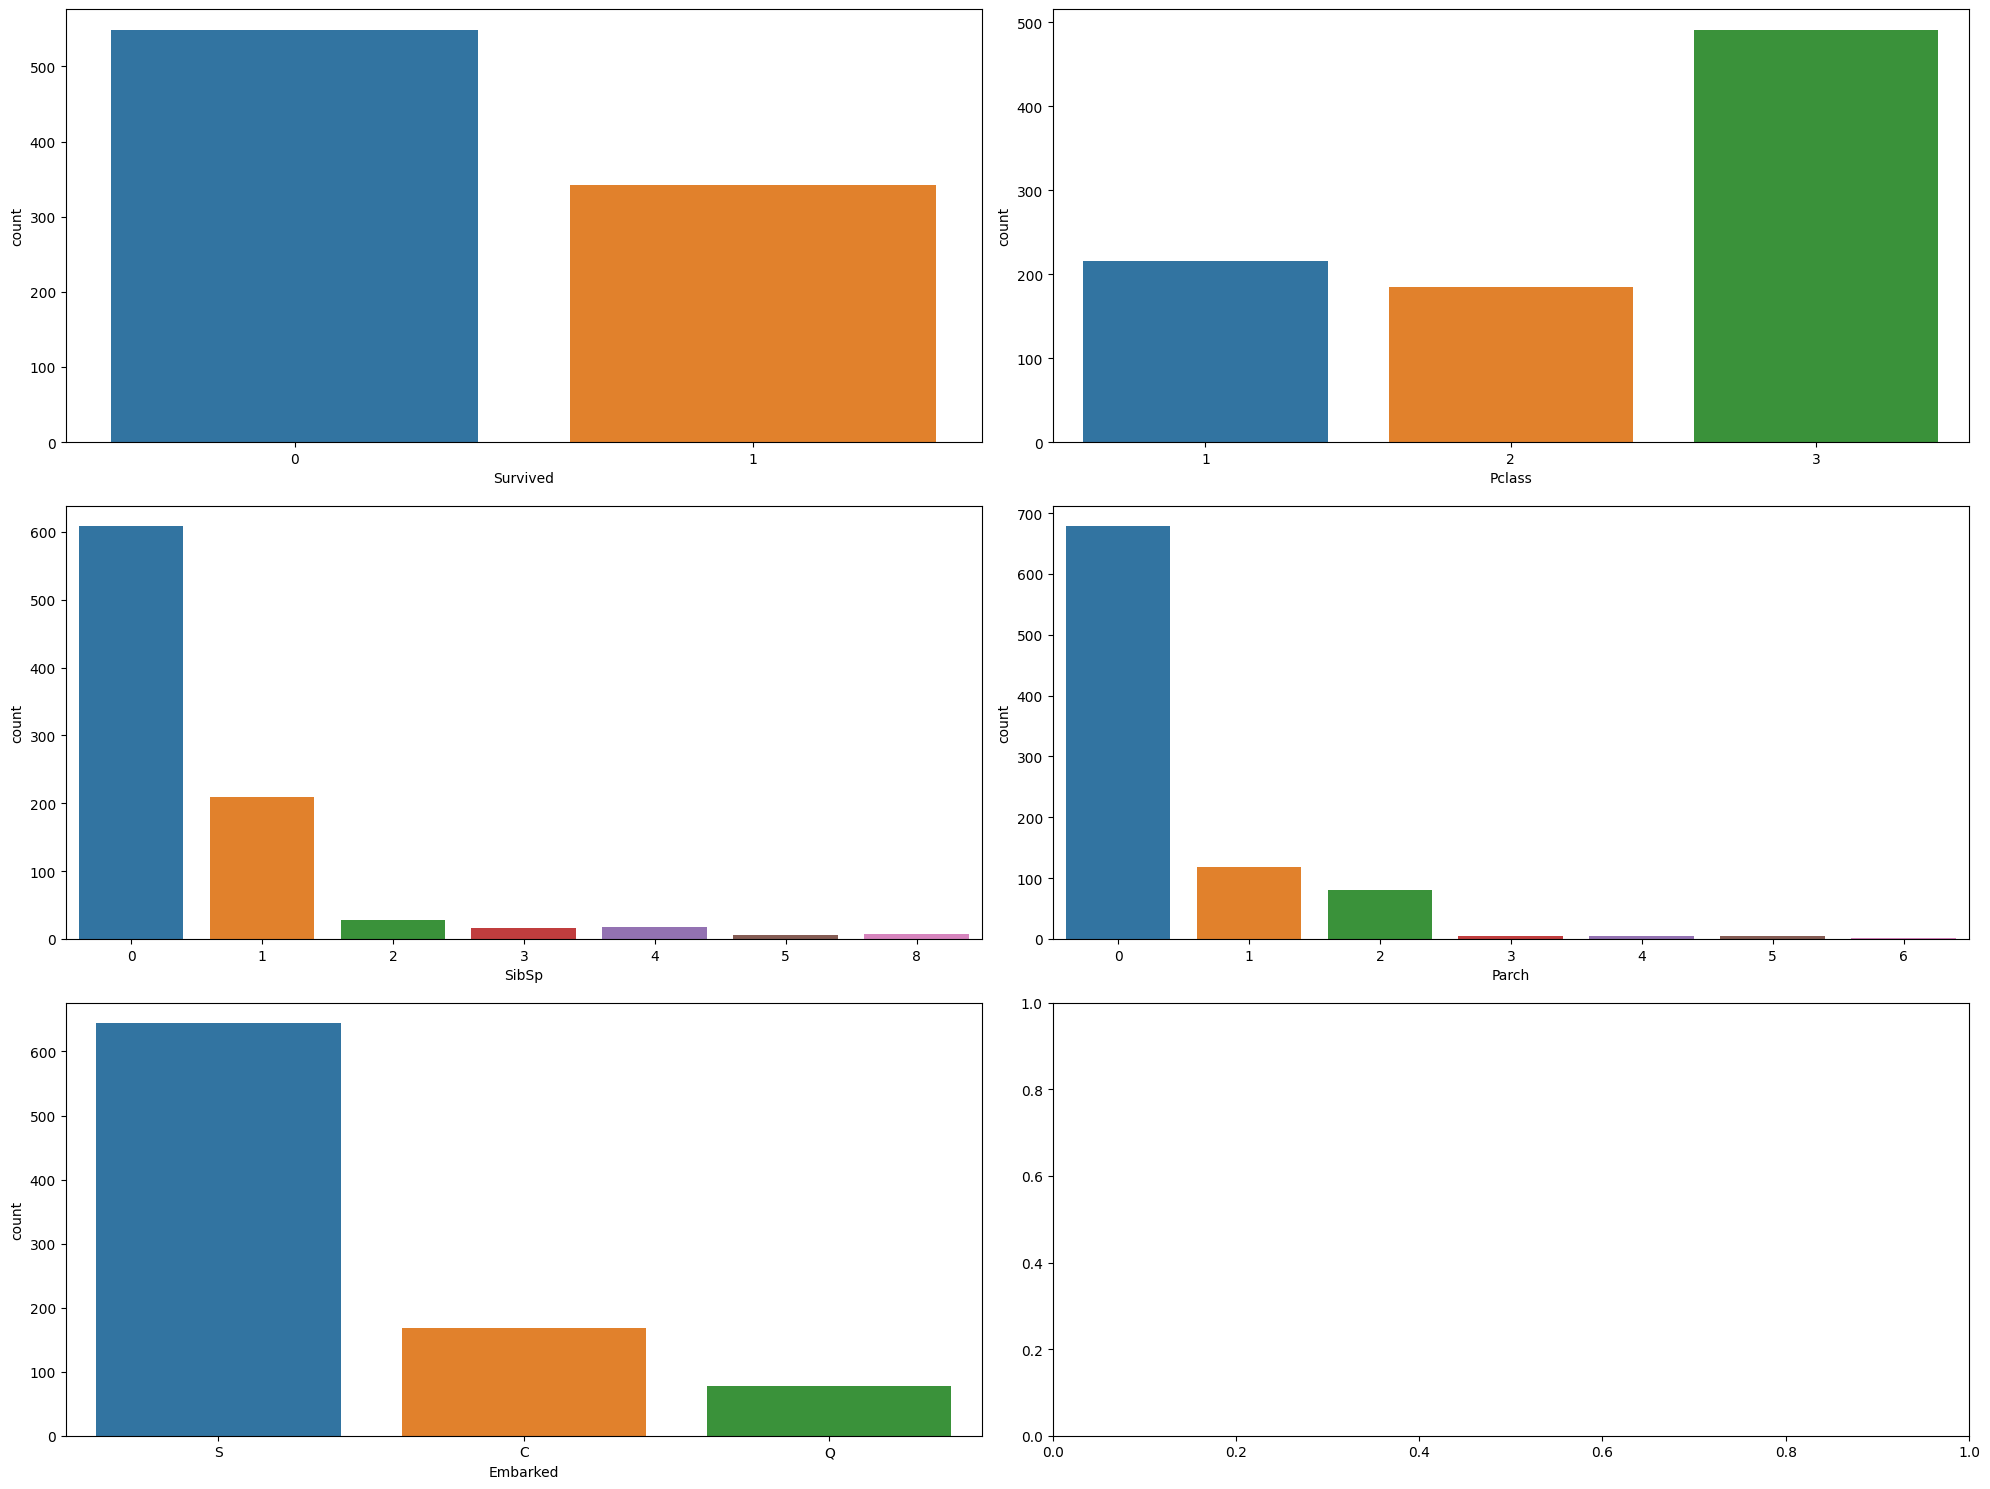

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical):
    sns.countplot(data = df, x = feature, ax = axes[i])

plt.tight_layout()
plt.show()

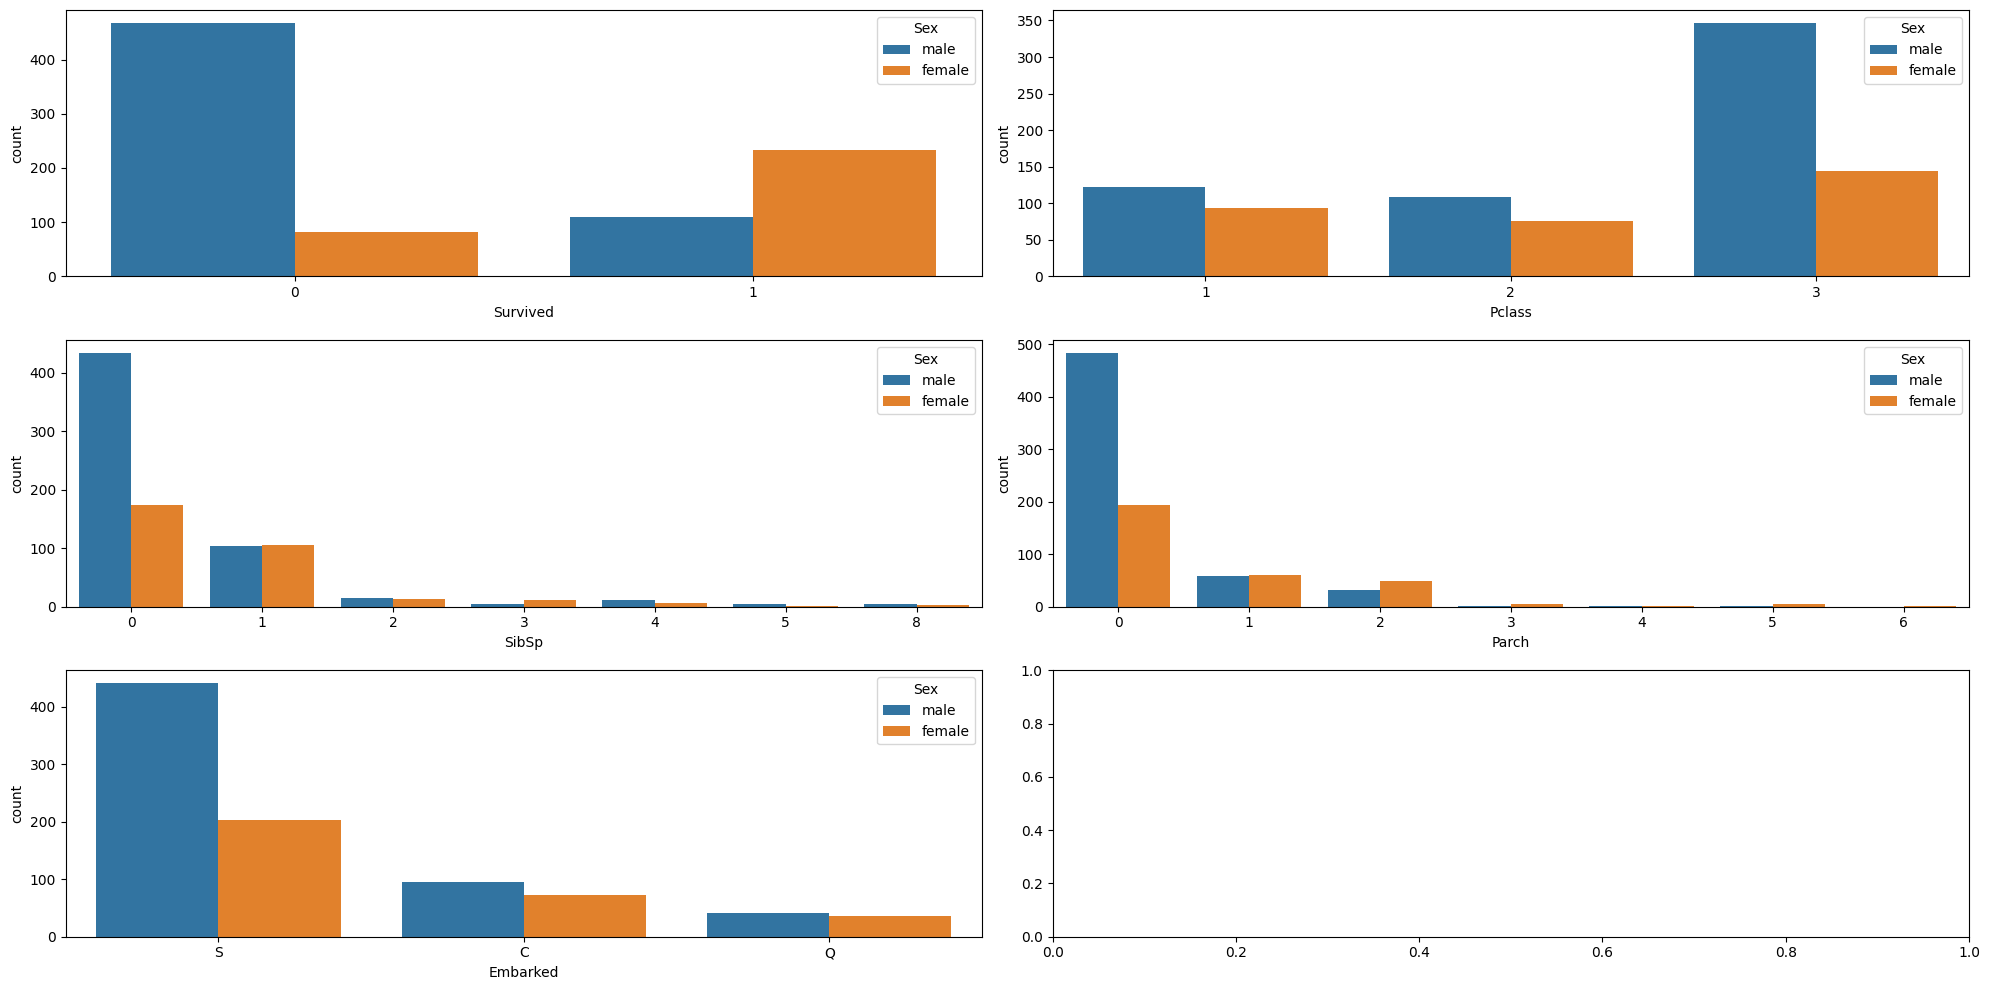

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical):
    sns.countplot(data = df, x = feature, hue = "Sex", ax = axes[i])

plt.tight_layout()
plt.show()

Numeric variables:

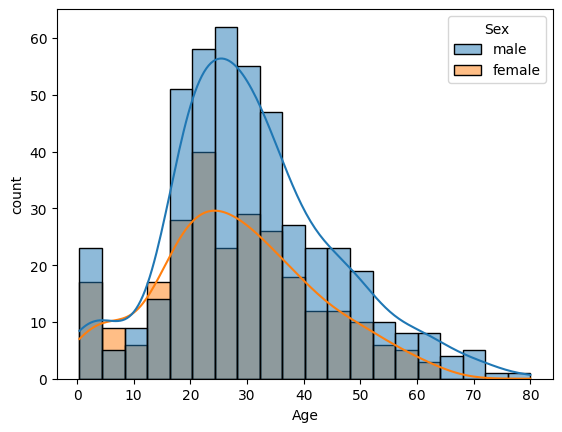

In [ ]:
# Age:
sns.histplot(df, x = "Age", hue = "Sex", kde = True)
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

Most passengers are between the ages of 18 - 35. The Age distribution resembles normal distribution.

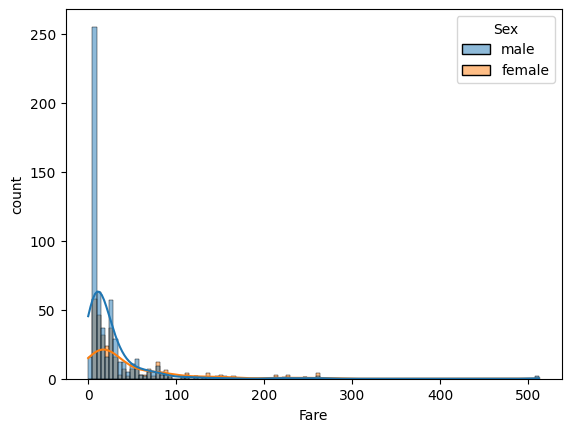

In [ ]:
# Fare:
sns.histplot(df, x = "Fare", hue = "Sex", kde = True)
plt.xlabel("Fare")
plt.ylabel("count")
plt.show()

The Fare variable is highly skewed. Perhaps, a transformation is useful.

In [ ]:
thresholds = [100, 200, 300]

for i in thresholds:
  count = (df["Fare"] >= i).sum()
  print(f"Number of rows with Fare > {i}: {count}")

Number of rows with Fare > 100: 53
Number of rows with Fare > 200: 20
Number of rows with Fare > 300: 3


In [ ]:
count = (df["Fare"] == 0).sum()
print(f"Number of rows with Fare equal to zero (free ride): {count}")

Number of rows with Fare equal to zero (free ride): 15


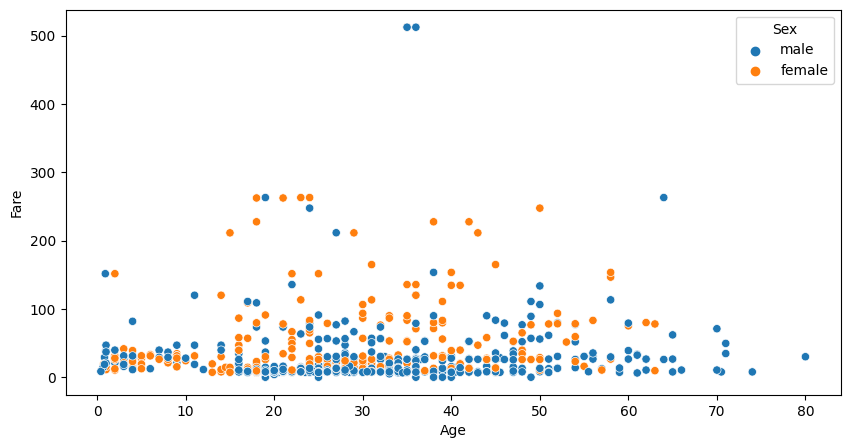

In [ ]:
plt.figure(figsize = (10, 5))

sns.scatterplot(data = df, x = "Age", y = "Fare", hue = "Sex")
plt.xlabel("Age")
plt.ylabel("Fare")

plt.show()

In [ ]:
features = df.keys()
features = features.drop("PassengerId")
df.groupby("Sex")[features].mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


We can see that:
- The majority of people who survived were females
- On avg. 74% of all females survived whereas only 18% of all males did
- Females paid a higher fare on average than males who had cheaper tickets
- Females were slightly younger on average than males


In [ ]:
df.groupby(["Sex", "Pclass"]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

We can see that:
- Women in the first and second classes had the highest chances of survival (above 90%)
- Men in first class had almost 3 times as low probability of survival as women in first class
- Men in first class had almost 3 times higher probabiity of survival than men in the third and second classes

In [ ]:
# Encoding Gender only for the purposes of the following table:
new_df = df.copy()
new_df["Sex"] = new_df['Sex'].map(lambda x: 0 if x == "female" else 1)

features = new_df.keys()
features = features.drop("PassengerId")
new_df.groupby("Embarked")[features].mean()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,0.553571,1.886905,0.565476,30.814769,0.386905,0.363095,59.954144
Q,0.389610,2.909091,0.532468,28.089286,0.428571,0.168831,13.276030
S,0.336957,2.350932,0.684783,29.445397,0.571429,0.413043,27.079812


We can see that:

- Passengers who aboarded Titanic in C (= Cherbourg) were mostly in the higher class and so had a higher chance of survival than everybody else
- The proportion of males and females was quite even in all 3 embarking cities, but mostly males embarked in S (= Southampton)
- Passengers in Q (= Queenstown) had the cheapest tickets so were in the lowest class

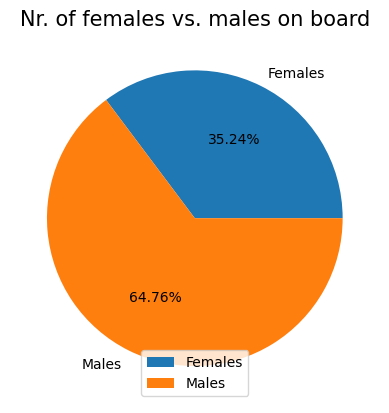

In [ ]:
sizes = [df.Sex.value_counts()[1], df.Sex.value_counts()[0]]
labels = ["Females", "Males"]

plt.pie(sizes, labels = labels, autopct = "%1.2f%%")
plt.legend(loc = "lower center")
plt.title("Nr. of females vs. males on board", size = 15)
plt.show()

### 4.3. Correlations

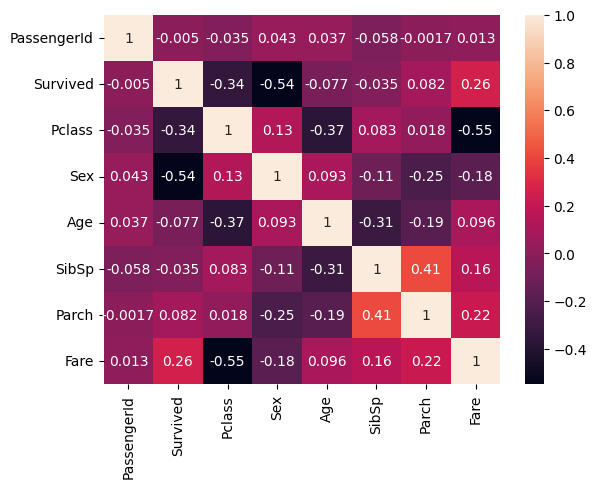

In [ ]:
# Encoding Gender only for the purposes of the following correlation matrix:
new_df = df.copy()
new_df["Sex"] = new_df['Sex'].map(lambda x: 0 if x == "female" else 1)

cm = new_df.corr()
sns.heatmap(cm, annot = True)
plt.show()

- Variables "Pclass" and "Fare" have a clear moderate negative correlation, indicating that higher-class tickets tend to have higher prices compared to lower-class tickets

- The "Sex" feature has the highest correlation with "Survived", indicating that whether a passenger survived or not will be a good indicator of the gender

- "Parch" (= nr. of parents / children) has the second highest correlation with "Sex"

- We should remove features which have a correlation of 0.75 or higher as these are considered highly correlated.

- None of the features in our dataset exceed this threshold so we will not remove any.

### 4.4. Checking for Duplicates

In [ ]:
# Observing the whole dataframe
duplicate_count = df.duplicated().sum()

if duplicate_count > 0:
    print(f'There are {duplicate_count} duplicate rows in the DataFrame.')
else:
    print('No duplicate rows found in the DataFrame.')

No duplicate rows found in the DataFrame.


### 4.5. Missing Data

In [ ]:
# Nr. of Missing values per column
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# % of Missing values per column
pd.isnull(df).mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

The only missing values are in the Age, Embarked and Cabin features.


<Axes: >

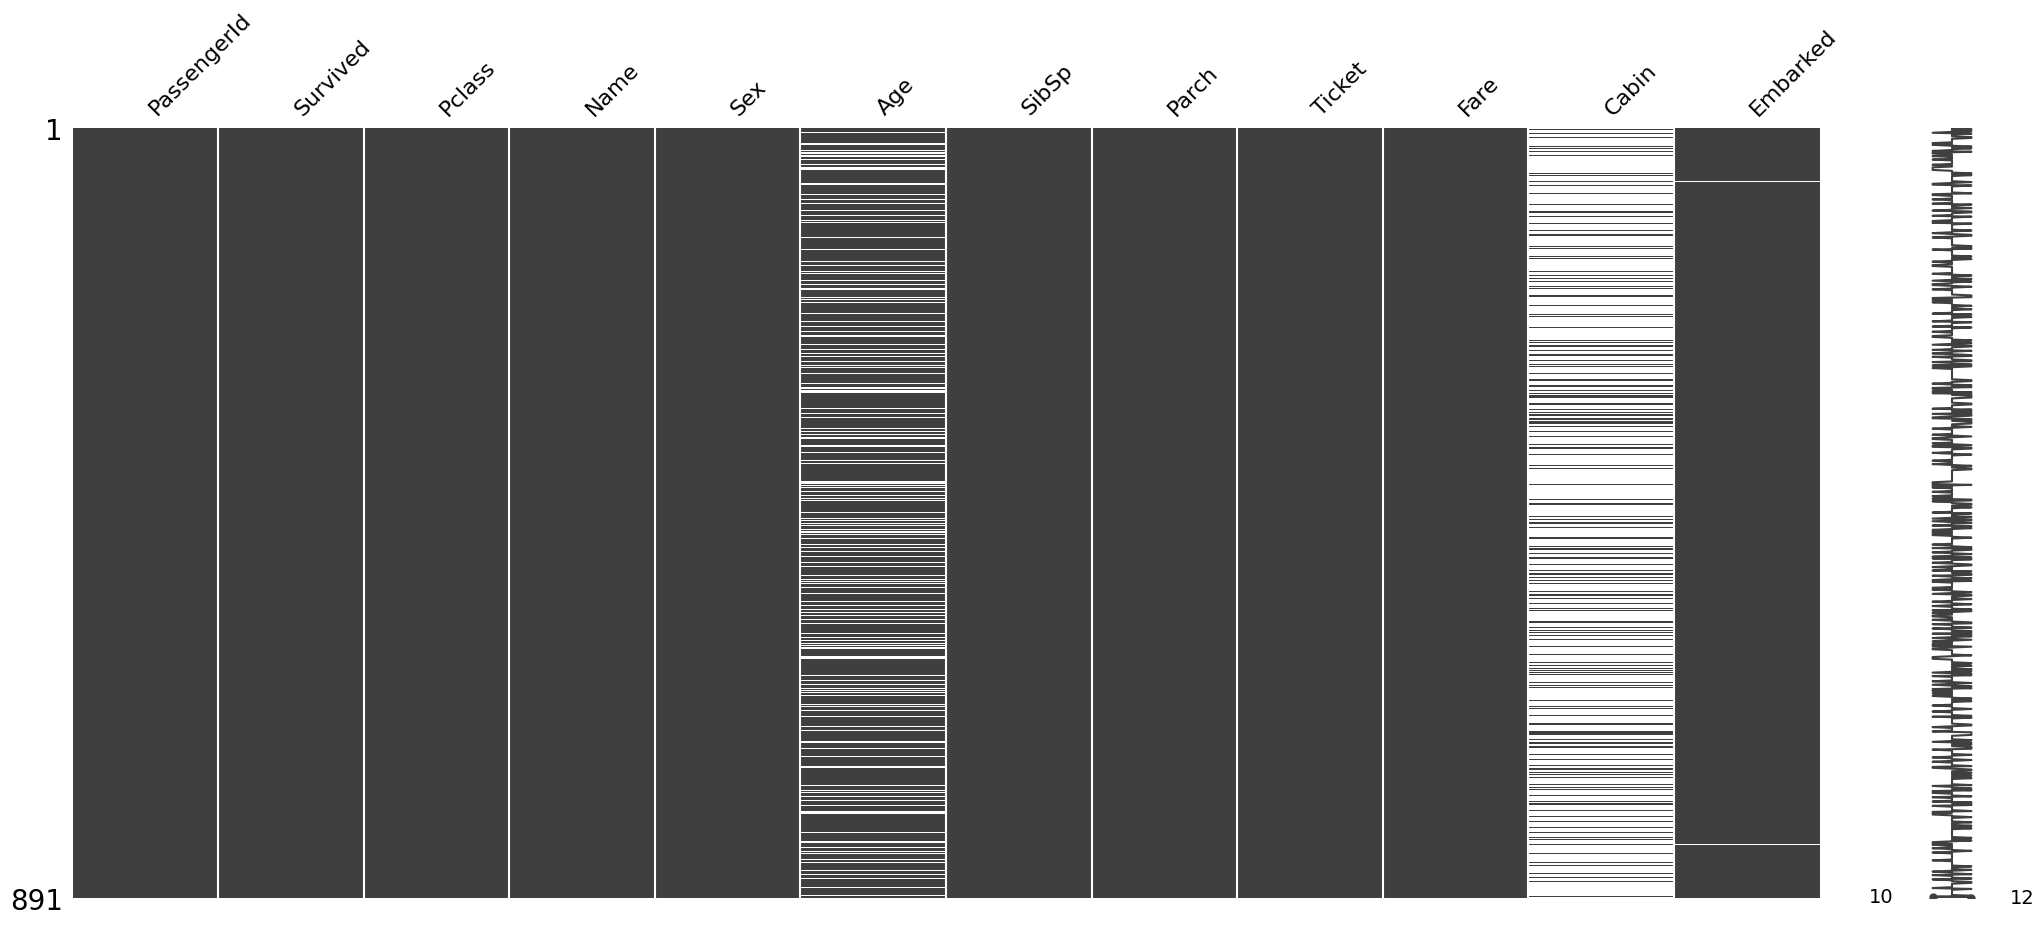

In [ ]:
# Visualize missing values as a matrix
msno.matrix(df)

Missing values seem to be occuring randomly, in no specific patterns.

## 5. Data Preprocessing

In [ ]:
# Binary Values Encoding (Encoding Sex)
df["Sex"] = df["Sex"].map(lambda x: 0 if x == "female" else 1)

### 5.1. Train/Test Split (Stratified)

In [ ]:
random_seed = 42

In [ ]:
target = "Sex"
X = df.loc[:, df.columns != target] # Explanatory variables
y = df[target] # Target variable

test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify = y, random_state = random_seed)

### 5.2. Removing Useless Features

- ID adds no useful information
- Name cannot be used for predicting gender
- Cabin had too many missing values (over 77%)
- Ticket number probably adds no useful information but I left it here to try and gain some information from it

In [ ]:
columns_to_drop = ["PassengerId", "Name", "Cabin"]
X_train.drop(columns_to_drop, axis = 1, inplace = True)
X_test.drop(columns_to_drop, axis = 1, inplace = True)

### 5.3. Missing Data Imputation

We will:
- Impute missing values in the "Embarked" column using the most frequent observation
- Impute missing values in the "Age" column using the mean

In [ ]:
# Imputing missing values for categorical features (Embarked)
categorical_imputer = SimpleImputer(strategy = "most_frequent")
X_train["Embarked"] = categorical_imputer.fit_transform(X_train[["Embarked"]])
X_test["Embarked"] = categorical_imputer.transform(X_test[["Embarked"]])

# Imputing missing values for numeric features (Age)
numeric_imputer = SimpleImputer(strategy = "mean")
X_train["Age"] = numeric_imputer.fit_transform(X_train[["Age"]])
X_test["Age"] = numeric_imputer.transform(X_test[["Age"]])

### 5.4. Outliers

We will be checking for outliers only in the relevant (numeric) features from the dataset

<Axes: xlabel='Fare'>

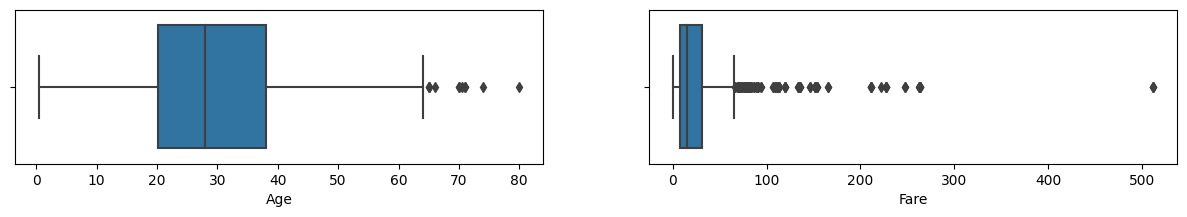

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 2))

sns.boxplot(data = df, x = "Age", ax = axes[0])
sns.boxplot(data = df, x = "Fare", ax = axes[1])

From the boxplots, we can see that there are some outliers for both features. We will look at these in more detail...

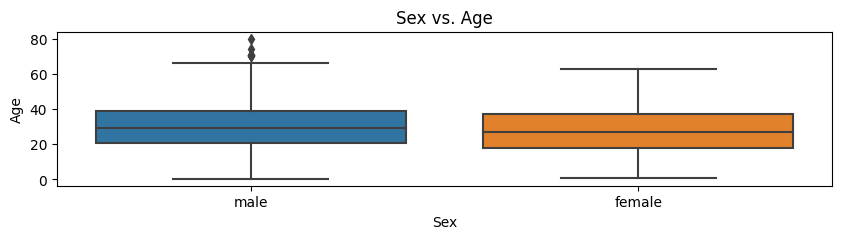

In [ ]:
plt.figure(figsize = (10, 2))
sns.boxplot(x = df["Sex"], y = df["Age"])
plt.title("Sex vs. Age")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

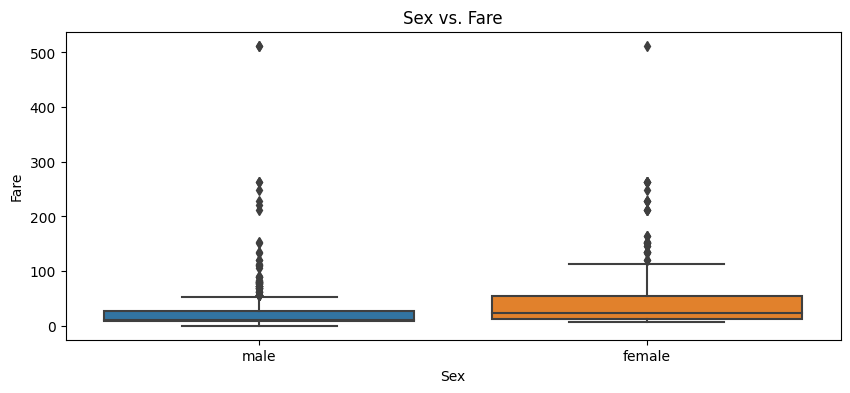

In [ ]:
plt.figure(figsize = (10, 4))
sns.boxplot(x = df["Sex"], y = df["Fare"])
plt.title("Sex vs. Fare")
plt.xlabel("Sex")
plt.ylabel("Fare")
plt.show()

- All the Age outliers are males
- The Fare outliers are both females and males

We will now observe the outliers mathematically using:
- The mean and std. dev. for "Age" as it is roughly normally distributed
- The interquantile range for "Fare" as it is not normally distributed

In [ ]:
def outlier_identifier_norm(feature, threshold = 3.0):
  """This function identifies outliers of a given feature using the mean and std. dev."""
  upper = df[feature].mean() + threshold * df[feature].std()
  lower = df[feature].mean() - threshold * df[feature].std()
  outlier_subset_df = df[(df[feature] < lower) | (df[feature] > upper)]
  return outlier_subset_df

def outlier_identifier_iqr(feature, threshold = 3.0):
  """This function identifies outliers of a given feature using the IQR"""
  higher_quantile = df[feature].quantile(0.75)
  lower_quantile = df[feature].quantile(0.25)
  feature_IQR = higher_quantile - lower_quantile
  upper = higher_quantile + (threshold * feature_IQR)
  lower = lower_quantile - (threshold * feature_IQR)
  outlier_subset_df = df[(df[feature] < lower) | (df[feature] > upper)]
  return outlier_subset_df

In [ ]:
# Counting the nr. of outliers
age_count = outlier_identifier_norm("Age").shape[0]
fare_count = outlier_identifier_iqr("Fare").shape[0]

print(f"There are {age_count} outliers of the Age variable.")
print(f"There are {fare_count} outliers of the Fare variable.")

There are 2 outliers of the Age variable.
There are 53 outliers of the Fare variable.


In [ ]:
# Observing the Age outliers
outliers_age = outlier_identifier_norm("Age")
outliers_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",1,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",1,74.0,0,0,347060,7.775,NaN,S


In [ ]:
# Observing the Fare outliers
outliers_fare = outlier_identifier_iqr("Fare")
outliers_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",1,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",0,23.00,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",1,24.00,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",0,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",0,31.00,1,0,35273,113.2750,D36,C
258,259,1,1,"Ward, Miss. Anna",0,35.00,0,0,PC 17755,512.3292,NaN,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",0,58.00,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",0,35.00,0,0,PC 17760,135.6333,C99,S
297,298,0,1,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S


**Note**
- I decided to leave the outliers in because they are "natural" outliers meaning that the values were correctly inputted in the data
- I tried removing the outliers but the accuracies did not really change so it did not make much of a difference

### 5.5. Creating new Features

- Combining the 2 features "SibSp" and "Parch" together to get the total number of relatives on board.

- Creating a second variable "Alone" indicating whether a passenger had no relatives on board or not.

In [ ]:
# Training set
X_train["Family_size"] = X_train["SibSp"] + X_train["Parch"] + 1
X_train.loc[X_train["Family_size"] > 0, "Alone"] = 0
X_train.loc[X_train["Family_size"] == 0, "Alone"] = 1
X_train["Alone"] = X_train["Alone"].astype(int)

# Testing set
X_test["Family_size"] = X_test["SibSp"] + X_test["Parch"] + 1
X_test.loc[X_test["Family_size"] > 0, "Alone"] = 0
X_test.loc[X_test["Family_size"] == 0, "Alone"] = 1
X_test["Alone"] = X_test["Alone"].astype(int)

In [ ]:
# Removing the original columns
columns_to_drop = ["SibSp", "Parch"]
X_train.drop(columns_to_drop, axis = 1, inplace = True)
X_test.drop(columns_to_drop, axis = 1, inplace = True)

- I will only keep the first element of the Ticket variable(a letter or a number) and remove the rest, as it may indicate some information

In [ ]:
X_train["Ticket"] = X_train["Ticket"].apply(lambda x: x[0])
X_test["Ticket"] = X_test["Ticket"].apply(lambda x: x[0])

In [ ]:
# Nr. of passengers for each ticket type:
X_train["Ticket"].value_counts()

3    224
2    129
1    104
P     44
S     37
C     34
A     21
7      7
W      6
4      5
F      4
6      3
L      2
5      1
9      1
8      1
Name: Ticket, dtype: int64

- The main Ticket categories are "1", "2", "3", "P", "S", and "C"
- I will combine all others into a category "R"

In [ ]:
X_train["Ticket"] = X_train["Ticket"].replace(["A", "W", "F", "L", "4", "5", "6", "7", "8", "9"], "R")
X_test["Ticket"] = X_test["Ticket"].replace(["A", "W", "F", "L", "4", "5", "6", "7", "8", "9"], "R")

In [ ]:
result = X_train[["Ticket", "Fare"]].groupby(["Ticket"], as_index = False).mean()
sorted_result = result.sort_values(by = "Fare", ascending = False)
sorted_result

,Ticket,Fare
4,P,101.529355
0,1,63.955127
3,C,27.178432
1,2,20.089214
6,S,17.408786
2,3,16.246758
5,R,15.589465


- As expected, the first numbers/letters might be indicative of the ticket type (for example P might suggest a Premium ticket, hence why it is so expensive).
- Ticket starting with 1 is on avg. more expensive than 2, and than 3

### 5.6. Encoding Categorical Features

In order for the models to work, all categorical variables have to be encoded first

In [ ]:
# Non-Binary Values Encoding
to_encode = ["Embarked", "Ticket"]

X_train_encoded = pd.get_dummies(X_train[to_encode], prefix = to_encode)
X_train = pd.concat([X_train, X_train_encoded], axis = 1)
X_train.drop(to_encode, axis = 1, inplace = True)

X_test_encoded = pd.get_dummies(X_test[to_encode], prefix = to_encode)
X_test = pd.concat([X_test, X_test_encoded], axis = 1)
X_test.drop(to_encode, axis = 1, inplace = True)

### 5.7. Solving Class Imbalance

In [ ]:
df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

We can see that our Target variable is slightly imbalanced in the dataset. We will try to remedy that using SMOTE.

In [ ]:
y_train.value_counts()

1    403
0    220
Name: Sex, dtype: int64

**Note**
- I tried tackling class imbalance by applying SMOTE but the results were not better, even slightly worse so I left it commented out

In [ ]:
# smote = SMOTE(sampling_strategy = 1, random_state = random_seed)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

1    403
0    403
Name: Sex, dtype: int64

### 5.8. Scaling

In [ ]:
ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(ss.transform(X_test), columns = X_test.columns, index = X_test.index)

### 5.9. Observing the Training Data

In [ ]:
X_train

,Survived,Pclass,Age,Fare,Family_size,Alone,Embarked_C,Embarked_Q,Embarked_S,Ticket_1,Ticket_2,Ticket_3,Ticket_C,Ticket_P,Ticket_R,Ticket_S
97,1.225564,-1.588242,-0.490670,0.701166,0.044714,0.0,2.101759,-0.311177,-1.632393,-0.447644,-0.511012,-0.749269,-0.24026,3.627546,-0.298598,-0.251277
198,1.225564,0.804684,0.000000,-0.528172,-0.574324,0.0,-0.475792,3.213607,-1.632393,-0.447644,-0.511012,1.334635,-0.24026,-0.275668,-0.298598,-0.251277
10,1.225564,0.804684,-1.938037,-0.330313,0.663752,0.0,-0.475792,-0.311177,0.612598,-0.447644,-0.511012,-0.749269,-0.24026,3.627546,-0.298598,-0.251277
808,-0.815951,-0.391779,0.728166,-0.412110,-0.574324,0.0,-0.475792,-0.311177,0.612598,-0.447644,1.956900,-0.749269,-0.24026,-0.275668,-0.298598,-0.251277
206,-0.815951,0.804684,0.194925,-0.349104,0.044714,0.0,-0.475792,-0.311177,0.612598,-0.447644,-0.511012,1.334635,-0.24026,-0.275668,-0.298598,-0.251277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.815951,0.804684,-0.719202,-0.543647,-0.574324,0.0,-0.475792,-0.311177,0.612598,-0.447644,-0.511012,-0.749269,-0.24026,-0.275668,-0.298598,3.979678
692,1.225564,0.804684,0.000000,0.549456,-0.574324,0.0,-0.475792,-0.311177,0.612598,2.233917,-0.511012,-0.749269,-0.24026,-0.275668,-0.298598,-0.251277
231,-0.815951,0.804684,-0.033607,-0.527619,-0.574324,0.0,-0.475792,-0.311177,0.612598,-0.447644,-0.511012,1.334635,-0.24026,-0.275668,-0.298598,-0.251277
870,-0.815951,0.804684,-0.262138,-0.524949,-0.574324,0.0,-0.475792,-0.311177,0.612598,-0.447644,-0.511012,1.334635,-0.24026,-0.275668,-0.298598,-0.251277


## 6. Modeling

### 6.1. Logistic Regression

We will be using GridSearchCV to find the best parameters for our models.

In [ ]:
# Hyperparameter Tuning
parameters_lr = {
    "penalty": ["l1", "l2", None], # Regularization penalty
    "C": [0.001, 0.01, 0.1, 1, 10], # Inverse of regularization strength
    "solver": ["saga", "liblinear"], # Algorithm to use for optimization
    "max_iter": [5000]
                }
scoring_method = "accuracy" # Also try "roc_auc", and "f1"

gridsearch_lr = GridSearchCV(LogisticRegression(random_state = random_seed), parameters_lr, cv = 5, scoring = scoring_method).fit(X_train, y_train)

In [ ]:
print("Best parameters for Logistic Regression: ", gridsearch_lr.best_params_)
print("Best score for Logistic Regression: ", gridsearch_lr.best_score_)

Best parameters for Logistic Regression:  {'C': 0.01, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for Logistic Regression:  0.788141935483871


In [ ]:
# Predictions
lr = gridsearch_lr.best_estimator_
predictions_lr = lr.predict(X_test)

Interpretation

In [ ]:
X_train.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Family_size', 'Alone',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Ticket_1', 'Ticket_2',
       'Ticket_3', 'Ticket_C', 'Ticket_P', 'Ticket_R', 'Ticket_S'],
      dtype='object')

In [ ]:
np.exp(lr.coef_) # These ratios represent how a one-unit change in the feature affects the odds of the event happening.

array([[0.53129146, 1.06611019, 1.06025472, 0.90750252, 0.80442993,
        1.        , 1.00496199, 0.88013604, 1.08005237, 1.09204708,
        0.92517086, 0.99097078, 1.02723067, 0.96978323, 0.98964377,
        1.0328663 ]])

- Surviving decreases your chance of being a male by a factor of 0.53 for example.

### 6.2. Decision Tree

In [ ]:
# Hyperparameter Tuning
parameters_dt = {
    "criterion": ["gini", "entropy"],          # Split criterion
    "max_depth": [2, 4, 6, 8, 10, 20],         # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],           # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],             # Minimum samples required to be at a leaf node
                }
scoring_method = "accuracy" # Also try "roc_auc", and "f1"

gridsearch_dt = GridSearchCV(DecisionTreeClassifier(random_state = random_seed), parameters_dt, cv = 5, scoring = scoring_method).fit(X_train, y_train)

In [ ]:
print("Best parameters for Decision Tree: ", gridsearch_dt.best_params_)
print("Best score for Decision Tree: ", gridsearch_dt.best_score_)

Best parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score for Decision Tree:  0.7881548387096775


In [ ]:
# Predictions
dt = gridsearch_dt.best_estimator_
predictions_dt = dt.predict(X_test)

### 6.3. Random Forest

In [ ]:
# Hyperparameter Tuning
parameters_rf = {
    "n_estimators": [50, 100, 200],           # Number of trees in the forest
    "max_depth": [2, 4, 6, 8, 10],            # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],          # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],            # Minimum samples required to be at a leaf node
                }
scoring_method = "accuracy" # Also try "accuracy", "roc_auc", and "f1"

gridsearch_rf = GridSearchCV(RandomForestClassifier(random_state = random_seed), parameters_rf, cv = 5, scoring = scoring_method).fit(X_train, y_train)

In [ ]:
print("Best parameters for Random Forest: ", gridsearch_rf.best_params_)
print("Best score for Random Forest: ", gridsearch_rf.best_score_)

Best parameters for Random Forest:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score for Random Forest:  0.8203096774193549


In [ ]:
rf = gridsearch_rf.best_estimator_
predictions_rf = rf.predict(X_test)

### 6.4. Feedforward Neural Network

In [ ]:
# Setting a random seed for reproducible results:
np.random.seed(random_seed)
tf.random.set_seed(random_seed)
random.seed(random_seed)

To be able to work with Tensorflow, we firstly need to convert the pandas dataframes to tensors.

In [ ]:
# Training set:
X_train_tensor = tf.convert_to_tensor(X_train)
y_train_tensor = tf.convert_to_tensor(y_train)

# Testing set:
X_test_tensor = tf.convert_to_tensor(X_test)
y_test_tensor = tf.convert_to_tensor(y_test)

Now, we will try different kinds of architectures to see which one performs the best.

In [ ]:
# Model 1 = Simple NN with 3 hidden layers:
inputs = keras.Input(shape = (X_train_tensor.shape[1],))
x1 = layers.Dense(9, activation = "relu")(inputs)     # 1st Hidden layer
x2 = layers.Dense(9, activation = "relu")(x1)         # 2nd Hidden layer
x3 = layers.Dense(5, activation = "relu")(x2)         # 3rd Hidden layer
outputs = layers.Dense(1, activation = "sigmoid")(x3) # Output layer with 1 node (binary classification)
model1 = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
# Model 2 = Simple NN with Dropout regularization
inputs = keras.Input(shape = (X_train_tensor.shape[1],))
x1 = layers.Dense(256, activation = "relu")(inputs)     # 1st Hidden layer
x2 = layers.Dropout(0.4)(x1)
x3 = layers.Dense(128, activation = "relu")(x2)         # 2nd Hidden layer
x4 = layers.Dropout(0.3)(x3)
x5 = layers.Dense(64, activation = "relu")(x4)          # 3rd Hidden layer
x6 = layers.Dropout(0.3)(x5)
outputs = layers.Dense(1, activation = "sigmoid")(x6)   # Output layer with 1 node (binary classification)
model2 = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
# Model 3 = Simple NN with L1 regularization
inputs = keras.Input(shape = (X_train_tensor.shape[1],))
x1 = layers.Dense(256, activation = "relu", kernel_regularizer = keras.regularizers.l1(0.01))(inputs)  # 1st Hidden layer with L1 regularization
x2 = layers.Dense(128, activation = "relu", kernel_regularizer = keras.regularizers.l1(0.01))(x1)      # 2nd Hidden layer with L1 regularization
outputs = layers.Dense(1, activation = "sigmoid")(x2)  # Output layer with 1 node (binary classification)
model3 = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
# Model 4 = Simple NN with L2 regularization
inputs = keras.Input(shape = (X_train_tensor.shape[1],))
x1 = layers.Dense(256, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.01))(inputs)  # 1st Hidden layer with L2 regularization
x2 = layers.Dense(128, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.01))(x1)      # 2nd Hidden layer with L2 regularization
outputs = layers.Dense(1, activation = "sigmoid")(x2)  # Output layer with 1 node (binary classification)
model4 = keras.Model(inputs = inputs, outputs = outputs)

- Convolutional neural networks are useful rather for image classification and not really here for this dataset but I decided to try this approach anyway

In [ ]:
# Model 5 = Convolutional NN

# Reshape the data to fit the requirements of a 1D Convolutional Neural Network
X_train_conv = X_train.values
X_test_conv = X_test.values

X_train_conv = np.reshape(X_train_conv, (X_train_conv.shape[0], X_train_conv.shape[1], 1))
X_test_conv = np.reshape(X_test_conv, (X_test_conv.shape[0], X_test_conv.shape[1], 1))

# Model architecture:
inputs = keras.Input(shape = (X_train_conv.shape[1], 1))
x1 = layers.Conv1D(filters = 32, kernel_size = 3, activation = "relu")(inputs)
x2 = layers.MaxPooling1D(pool_size = 2)(x1)
x3 = layers.Conv1D(filters = 64, kernel_size = 3, activation = "relu")(x2)
x4 = layers.Flatten()(x3)
outputs = layers.Dense(1, activation = "sigmoid")(x4)
model5 = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
models = [model1, model2, model3, model4, model5]

Model Compilation:

In [ ]:
for i, model in enumerate(models, start = 1):
    print(f"Compiling and summarizing Model {i}:")
    model.compile(optimizer = "adam",
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"])
    model.summary()

Compiling and summarizing Model 1:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 9)                 153       
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 5)                 50        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 299 (1.17 KB)
Trainable params: 299 (1.17 KB)
Non-trainable params: 0 (0.00 Byte)
______________________________________________________________

Model Fitting:

In [ ]:
# Takes approx. 30 sec. on CPU
model_results = []
for model in models:
  epochs = 50 # Nr. of epochs the model will perform
  batch_size = 32 # Nr. of training examples utilized in one iteration
  results = model.fit(X_train_tensor, y_train_tensor,
            epochs = epochs,
            batch_size = batch_size,
            validation_split = 0.2,
            verbose = 0)
  model_results.append(results)

Model Accuracies:

In [ ]:
for i, model in enumerate(models, start = 1):
    train_accuracy = model_results[i-1].history["accuracy"][-1]
    test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)

    print(f"Results for Model {i}:")
    print(f"Training accuracy: {np.round(train_accuracy, 4)}")
    print(f"Testing accuracy: {np.round(test_accuracy, 4)}")
    print("\n")

9/9 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7985
Results for Model 1:
Training accuracy: 0.7932
Testing accuracy: 0.7985


9/9 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7948
Results for Model 2:
Training accuracy: 0.8273
Testing accuracy: 0.7948


9/9 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.6493
Results for Model 3:
Training accuracy: 0.6386
Testing accuracy: 0.6493


9/9 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.8134
Results for Model 4:
Training accuracy: 0.8333
Testing accuracy: 0.8134


9/9 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.8022
Results for Model 5:
Training accuracy: 0.8293
Testing accuracy: 0.8022




- L1 regularization does not seem to be working well here
- Model with L2 regularization yields the most accurate results (81.3% Testing accuracy) and, therefore, is the best Neural Network model out of the ones tested for this dataset

In [ ]:
nn_results = model_results[3] # Saving model4 results to this variable for future evaluation
nn = models[3] # Saving the best model to a new variable

Predictions:

In [ ]:
predictions = model.predict(X_test)
predictions_nn = (predictions > 0.5).astype(int).reshape(X_test.shape[0])
predictions_nn

9/9 [==============================] - 0s 4ms/step


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1])

**Hyperparameter Tuning Using Keras Tuner**

In [ ]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from kerastuner.tuners import RandomSearch

In [ ]:
# Defining the Model function
def build_model(hp):
    model = keras.Sequential()

    # Input Layer
    model.add(keras.layers.Input(shape = (X_train_tensor.shape[1],)))

    # Variable nr. of Hidden layers
    for i in range(hp.Int("num_layers", 2, 10)):
        units = hp.Int(f"units_{i}", min_value = 4, max_value = 512, step = 16)
        # Add a dense layer with L2 regularization
        model.add(keras.layers.Dense(units = units, activation = "relu",
                                     kernel_regularizer = keras.regularizers.l2(hp.Choice(f"l2_{i}", values = [0.001, 0.01, 0.1]))))

    # Output Layer
    model.add(keras.layers.Dense(1, activation = "sigmoid"))

    # Model Compilation
    model.compile(optimizer = keras.optimizers.Adam(hp.Choice("learning_rate", values = [1e-2, 1e-3, 1e-4])),
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"])

    return model

In [ ]:
# Initializing the Tuner
tuner = RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 10,
    executions_per_trial = 5,
    directory = "my_dir",
    project_name = "titanic")

In [ ]:
# Fitting the Models (Takes approx. 3-7 min. on CPU)
tuner.search(X_train_tensor, y_train_tensor, epochs = 50, validation_split = 0.2, verbose = 0)

In [ ]:
# Getting the Best Model and its Hyperparameters
best_model_nn = tuner.get_best_models(num_models = 1)[0]
best_hyperparams_nn = tuner.get_best_hyperparameters(num_trials = 1)[0]

In [ ]:
# Testing Accuracy
test_loss, test_accuracy = best_model_nn.evaluate(X_test_tensor, y_test_tensor)
test_accuracy

9/9 [==============================] - 0s 5ms/step - loss: 0.5267 - accuracy: 0.8097


0.8097015023231506

In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/titanic
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
num_layers: 6
units_0: 244
l2_0: 0.001
units_1: 292
l2_1: 0.1
learning_rate: 0.001
units_2: 180
l2_2: 0.001
units_3: 20
l2_3: 0.001
units_4: 372
l2_4: 0.01
units_5: 420
l2_5: 0.01
units_6: 308
l2_6: 0.001
units_7: 372
l2_7: 0.001
units_8: 468
l2_8: 0.01
units_9: 452
l2_9: 0.1
Score: 0.8783999919891358

Trial 02 summary
Hyperparameters:
num_layers: 5
units_0: 212
l2_0: 0.001
units_1: 372
l2_1: 0.1
learning_rate: 0.01
units_2: 148
l2_2: 0.01
units_3: 180
l2_3: 0.01
units_4: 420
l2_4: 0.01
units_5: 100
l2_5: 0.001
units_6: 20
l2_6: 0.1
units_7: 468
l2_7: 0.1
units_8: 260
l2_8: 0.001
units_9: 244
l2_9: 0.01
Score: 0.8768000125885009

Trial 08 summary
Hyperparameters:
num_layers: 6
units_0: 228
l2_0: 0.001
units_1: 228
l2_1: 0.001
learning_rate: 0.001
units_2: 404
l2_2: 0.001
units_3: 260
l2_3: 0.01
units_4: 100
l2_4: 0.001
units_5: 324
l2_5: 0.

- So we can see that tuning did not really improve our initial Neural Network model so we will keep the previous one which had about 81.3% testing accuracy

**Note:**

Embeddings are often used in neural networks when there is a lot of categorical and text data (NLP for example). However, in our case only 5 features from the original dataset were categorical:
- Name (which I could not use)
- Sex (which is the target)
- Cabin (which had too many missing values)
- Ticket (Includes mostly numeric values but some letters too)
- Embarked

So, we only had 2 features (Ticket and Embarked) to really work with and Ticket is more numeric than categorical so I did not really see the advantage of using embeddings in this case.

## 7. Evaluation

### 7.1. Defining Evaluation Functions

In [ ]:
def evaluate_model(model):
  """This function takes a model as an argument and outputs evaluation metrics."""
  model_name = model.__class__.__name__

  # Predictions
  predictions = model.predict(X_test)

  # Metrics
  training_accuracy = np.round(model.score(X_train, y_train), 3)
  testing_accuracy = np.round(model.score(X_test, y_test), 3)
  F1_score = np.round(f1_score(y_test, predictions, average = "binary", labels = [0, 1]), 3) # Assuming binary classification

  # Printing
  print(f"The training accuracy of {model_name} is {training_accuracy}.")
  print(f"The testing accuracy of {model_name} is {testing_accuracy}.")
  print(f"The F1 score of {model_name} is {F1_score}.")

In [ ]:
# Evaluating the model using Stratified K-fold Crossvalidation
def evaluate_model_crossvalidated(model):
  """This function takes a model as an argument and outputs evaluation metrics using Stratified cross-validation."""

  # Cross-validation
  training_accuracies = []
  testing_accuracies = []
  f1_scores = []
  precision_scores = []
  recall_scores = []
  cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_seed)

  for train_index, test_index in cv.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Fitting and Predicting
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_test_pred = model.predict(X_test_fold)

        # Calculating Metrics
        train_accuracy = accuracy_score(y_train_fold, y_train_pred)
        test_accuracy = accuracy_score(y_test_fold, y_test_pred)
        f1 = f1_score(y_test_fold, y_test_pred, average = "binary")  # As we have binary classification
        precision = precision_score(y_test_fold, y_test_pred)
        recall = recall_score(y_test_fold, y_test_pred)

        # Adding Metrics to the lists
        training_accuracies.append(train_accuracy)
        testing_accuracies.append(test_accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

  # Printing the average scores out of all folds
  return [np.mean(training_accuracies), np.mean(testing_accuracies), np.mean(f1_scores), np.mean(precision_scores), np.mean(recall_scores)]

In [ ]:
def print_metrics_crossvalidated(model, train, test, f1, precision, recall):
  """This function takes a model and metrics as arguments and prints these metrics."""
  model_name = model.__class__.__name__

  # Printing
  print(f"The average training accuracy of {model_name} is {train}.")
  print(f"The average testing accuracy of {model_name} is {test}.")
  print(f"The average F1 score of {model_name} is {f1}.")
  print(f"The average Precision score of {model_name} is {precision}.")
  print(f"The average Recall score of {model_name} is {recall}.")

In [ ]:
def feature_importance(model):
    """This function takes a model as an argument and outputs a feature-importance graph."""
    features = {}
    for feature, importance in zip(X_train.columns, model.feature_importances_):
      features[feature] = importance
    importances = pd.DataFrame.from_dict(features, orient = "index").rename(columns = {0: "Gini-importance"})
    importances_sorted = importances.sort_values(by = "Gini-importance")

    plt.figure(figsize = (12, 5))
    plt.bar(importances_sorted.index, importances_sorted["Gini-importance"], color = "blue")
    plt.title("Feature Importance")
    plt.ylabel("Gini Importance")
    plt.xticks(rotation = 45)
    plt.show()

In [ ]:
def confmat(predictions):
  """This function takes model´s predictions as an argument and outputs a confusion matrix."""
  cm = confusion_matrix(y_test, predictions, labels = [0, 1])
  ConfusionMatrixDisplay(cm, display_labels = ["Female", "Male"]).plot()

In [ ]:
def roc_curve_auc(model):
  """This function takes model´s predictions as an argument and outputs ROC curve as well as AUC score."""
  model_name = model.__class__.__name__
  predictions_prob = model.predict_proba(X_test.values)[:, 1] # Probabilities of the samples being a positive class
  fpr, tpr, threshold = roc_curve(y_test, predictions_prob, pos_label = model.classes_[1])
  roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = model_name)
  roc_display.plot()
  plt.title(f"Roc Curve for {model_name}")
  plt.show()

  # Area under the curve (AUC) Score
  auc_score = roc_auc_score(y_test, predictions_prob)
  print(f"The AUC score of {model_name} is {auc_score}.")

### 7.2. Logistic Regression

In [ ]:
evaluate_model(lr)

The training accuracy of LogisticRegression is 0.791.
The testing accuracy of LogisticRegression is 0.799.
The F1 score of LogisticRegression is 0.847.


In [ ]:
train, test, f1, precision, recall = evaluate_model_crossvalidated(lr)
print_metrics_crossvalidated(lr, train, test, f1, precision, recall)

The average training accuracy of LogisticRegression is 0.7906187929717341.
The average testing accuracy of LogisticRegression is 0.7784178187403994.
The average F1 score of LogisticRegression is 0.8246157821647243.
The average Precision score of LogisticRegression is 0.8473637368343612.
The average Recall score of LogisticRegression is 0.806219512195122.


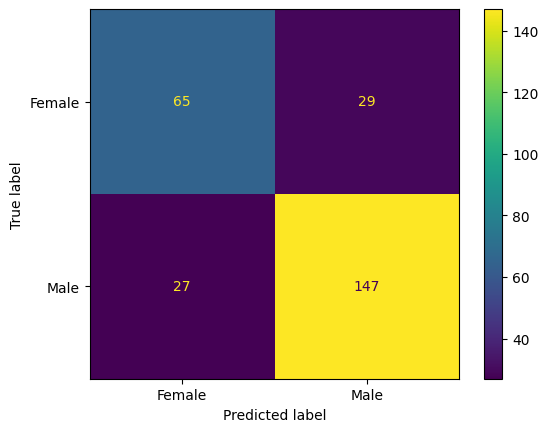

In [ ]:
confmat(predictions_lr)

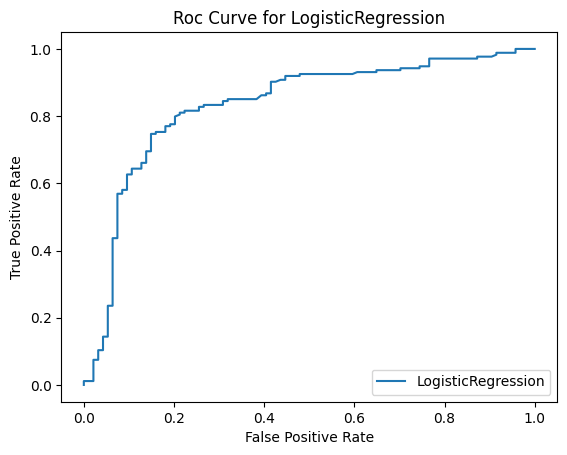

The AUC score of LogisticRegression is 0.8321716801173881.


In [ ]:
roc_curve_auc(lr)

### 7.3. Decision Tree

In [ ]:
evaluate_model(dt)

The training accuracy of DecisionTreeClassifier is 0.809.
The testing accuracy of DecisionTreeClassifier is 0.791.
The F1 score of DecisionTreeClassifier is 0.84.


In [ ]:
train, test, f1, precision, recall = evaluate_model_crossvalidated(dt)
print_metrics_crossvalidated(dt, train, test, f1, precision, recall)

The average training accuracy of DecisionTreeClassifier is 0.8118433282403871.
The average testing accuracy of DecisionTreeClassifier is 0.7880952380952382.
The average F1 score of DecisionTreeClassifier is 0.8333370205743618.
The average Precision score of DecisionTreeClassifier is 0.8484688118959219.
The average Recall score of DecisionTreeClassifier is 0.8239024390243903.


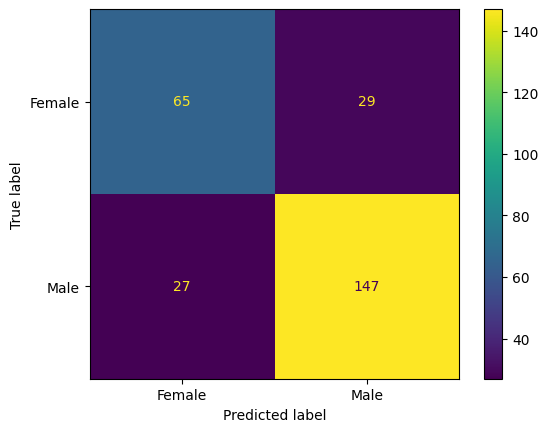

In [ ]:
confmat(predictions_dt)

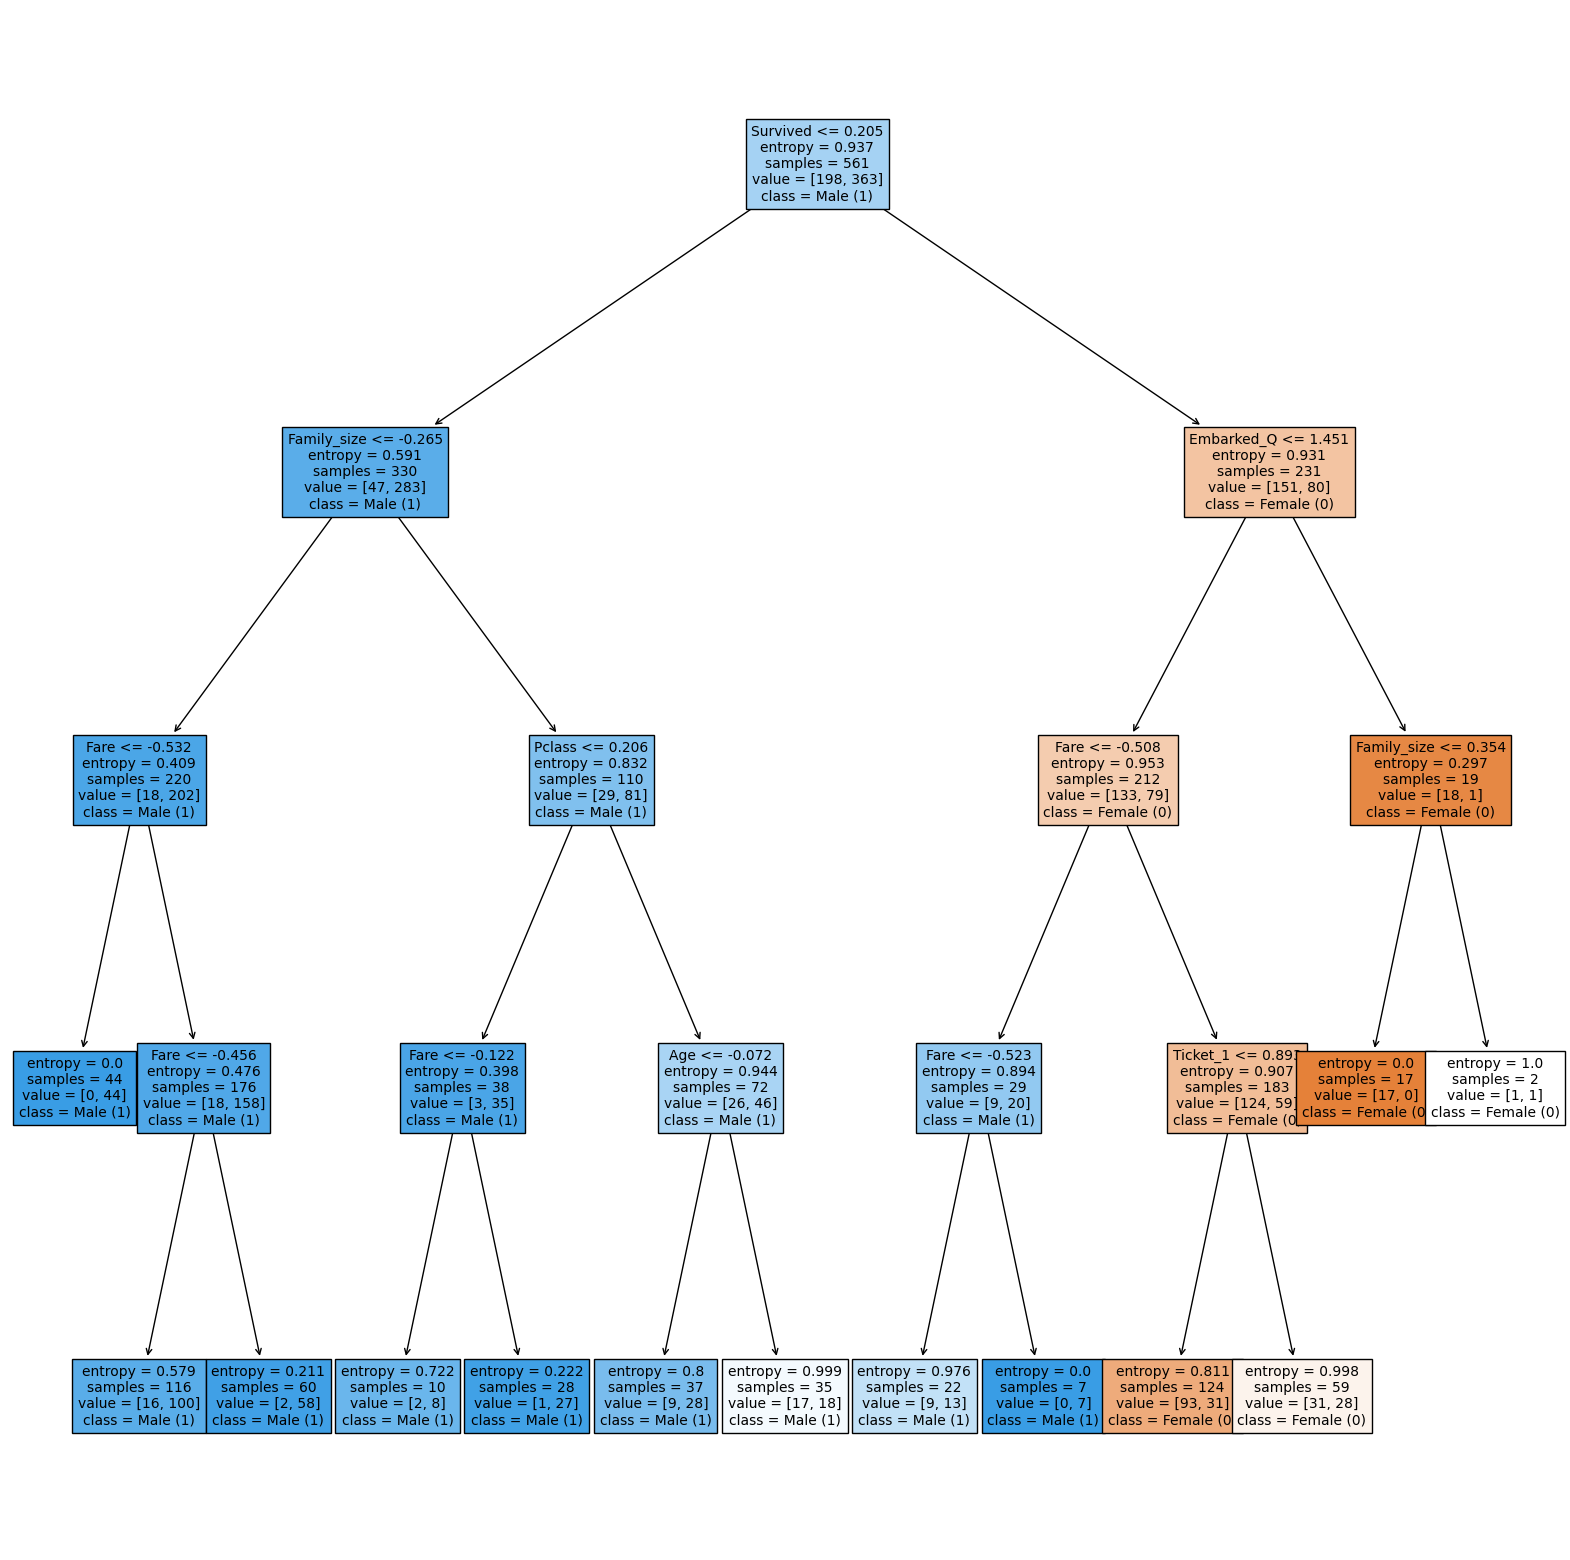

In [ ]:
plt.figure(figsize = (20, 20))
plot_tree(dt, feature_names = list(X_train.columns), class_names = ["Female (0)", "Male (1)"], filled = True, fontsize = 10)
plt.show()

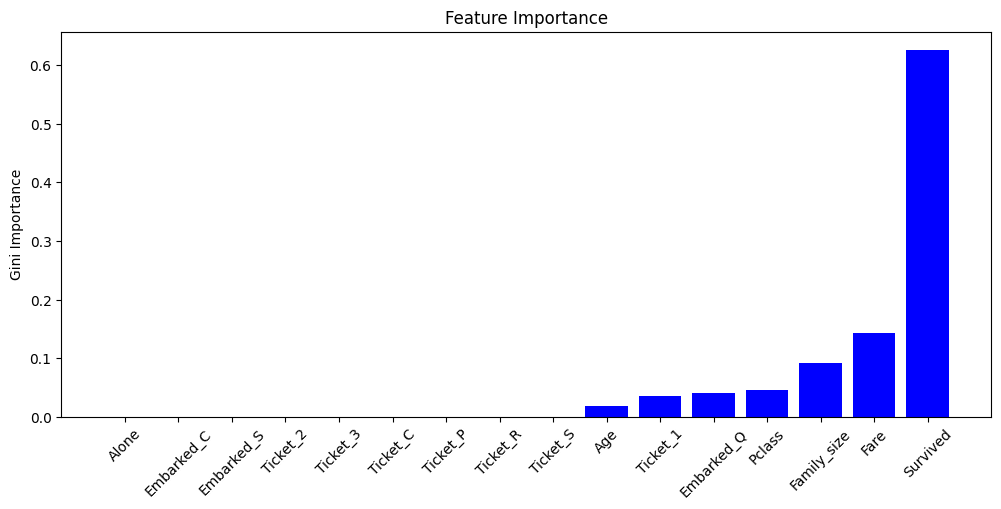

In [ ]:
feature_importance(dt)

Survived, Fare, and Family size seem to be the top 3 most important features.

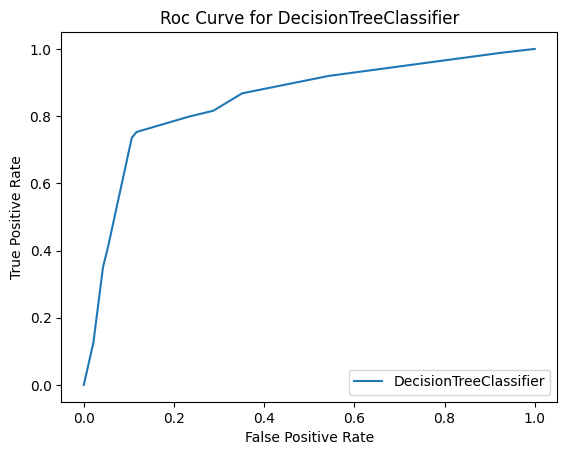

The AUC score of DecisionTreeClassifier is 0.8468146246025924.


In [ ]:
roc_curve_auc(dt)

### 7.4. Random Forest

In [ ]:
evaluate_model(rf)

The training accuracy of RandomForestClassifier is 0.835.
The testing accuracy of RandomForestClassifier is 0.799.
The F1 score of RandomForestClassifier is 0.855.


In [ ]:
train, test, f1, precision, recall = evaluate_model_crossvalidated(rf)
print_metrics_crossvalidated(rf, train, test, f1, precision, recall)

The average training accuracy of RandomForestClassifier is 0.8319961166284695.
The average testing accuracy of RandomForestClassifier is 0.816973886328725.
The average F1 score of RandomForestClassifier is 0.8633503685061376.
The average Precision score of RandomForestClassifier is 0.8399627003261403.
The average Recall score of RandomForestClassifier is 0.8907317073170731.


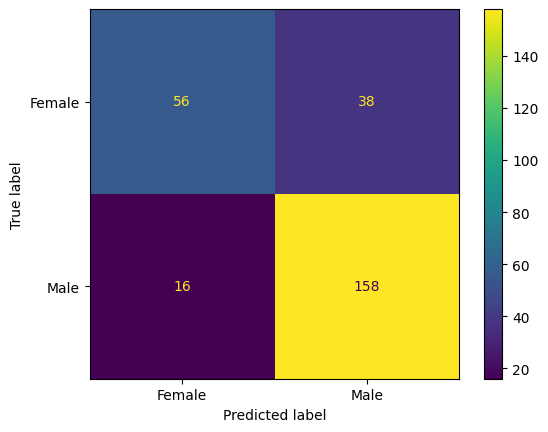

In [ ]:
confmat(predictions_rf)

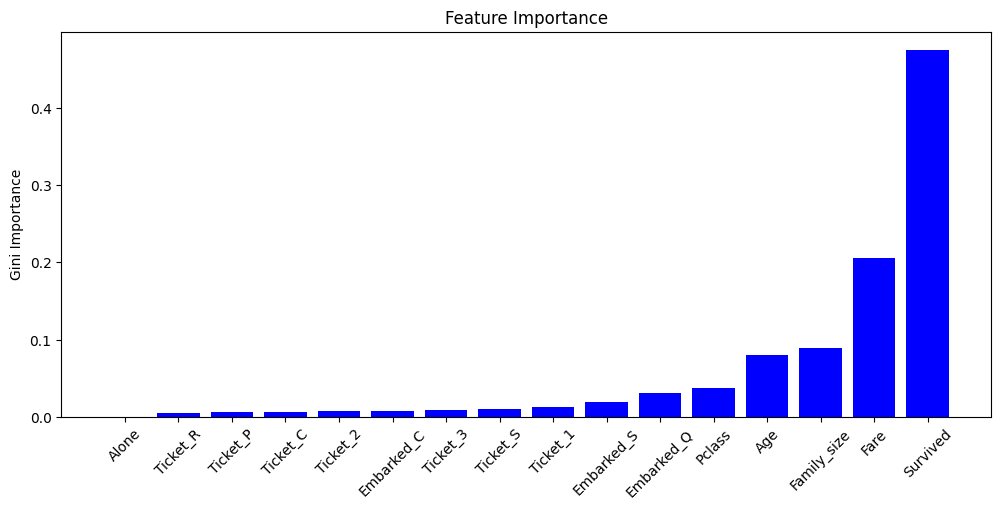

In [ ]:
feature_importance(rf)

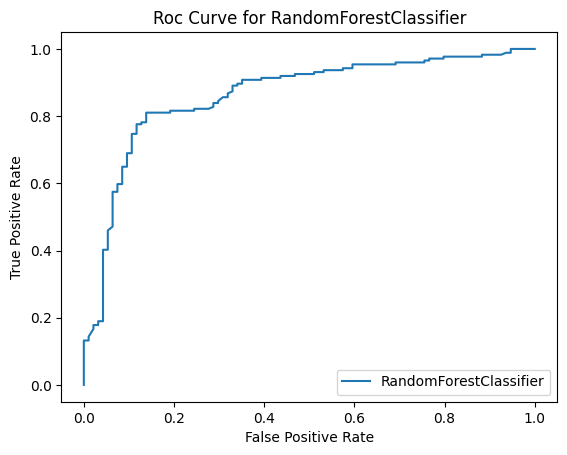

The AUC score of RandomForestClassifier is 0.8633223281976032.


In [ ]:
roc_curve_auc(rf)

### 7.5. Neural Network

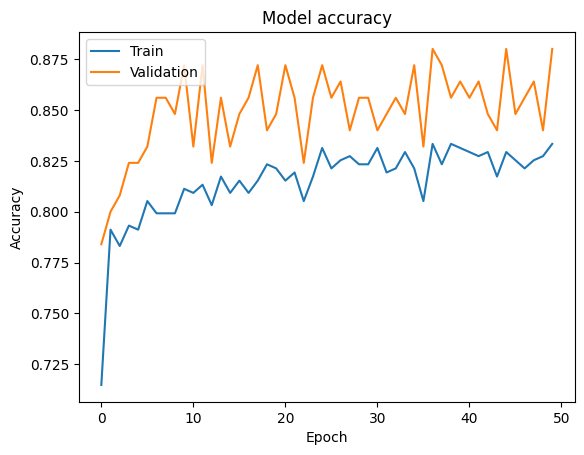

In [ ]:
# Accuracy Summary
plt.plot(nn_results.history["accuracy"])
plt.plot(nn_results.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.show()

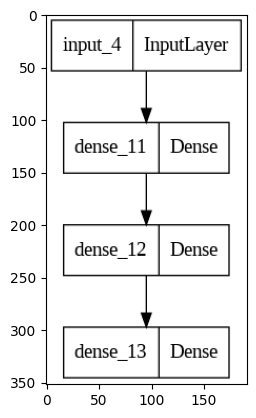

In [ ]:
# Plotting the model
plot_model(nn, to_file = "model.png")

data = plt.imread("model.png")
plt.imshow(data)
plt.show()

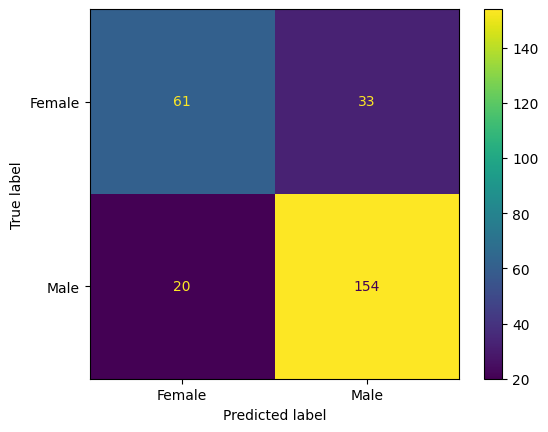

In [ ]:
confmat(predictions_nn)

## 8. Model Comparison

In [ ]:
# Scikit-learn models:
models = [lr, dt, rf]
labels = ["Logistic Regression", "Decision Tree", "Random Forest"]
metrics_summary = pd.DataFrame()
metrics_summary.index = ["Training score", "Testing score", "F1 score", "Precision score", "Recall score"]

def compare_models(models, labels):
  for i, model in enumerate(models):
    metrics_summary[labels[i]] = evaluate_model_crossvalidated(model)
  return metrics_summary

In [ ]:
# Adding the Neural Network results:
summary_table = compare_models(models, labels)
summary_table.loc[["Training score"], "Neural Network"] = nn_results.history["accuracy"][-1]
summary_table.loc[["Testing score"], "Neural Network"] = nn.evaluate(X_test_tensor, y_test_tensor)[1]
summary_table.loc[["F1 score", "Precision score", "Recall score"], "Neural Network"] = "-"
summary_table

9/9 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.8134


,Logistic Regression,Decision Tree,Random Forest,Neural Network
Training score,0.790619,0.811843,0.831996,0.833333
Testing score,0.778418,0.788095,0.816974,0.813433
F1 score,0.824616,0.833337,0.863350,-
Precision score,0.847364,0.848469,0.839963,-
Recall score,0.806220,0.823902,0.890732,-


- Neural Network indeed managed to outperform the Decision Tree model  by about 3% on the validation dataset
- However, it performed pretty much equally as a more robust "standard" model - Random Forest, both achieving a 81% accuracy on the validation dataset